<a href="https://colab.research.google.com/github/shivjaiswal-coder/Brain_tumar_detection/blob/main/final_brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Brain Tumor Dataset 2020**
It was made available by Kaggle as part of a computer-vision competition in 2020.The dataset can be downloaded from https://www.kaggle.com/ahmedhamada0/brain-tumor-detection/data

The dataset contains 3 folders: yes, no and pred which contains 3060 Brain MRI Images.
* The folder "yes" contains 1500 Brain MRI Images that are tumorous
* The folder "no" contains 1500 Brain MRI Images that are non-tumorous

The dataset is further divided into training and testing folder which contains two sub-folder "yes" and "no" each. The first 250 images from "yes" and "no" folder of training is moved to "yes" and "no" folder of testing. As a result we have 2500 training and 500 testing images of both class.

The pred folder is left for making prediction 

*   **Mounting google drive in colab**
*   **importing os and shutil to operate with file objects easily**



In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os, shutil

Mounted at /content/drive


## **Path to dataset having testing and training folder** 

In [2]:
original_dataset_dir = '/content/drive/MyDrive/brain_tumor'

## **Path to the training and testing directory**

In [3]:
train_dir='/content/drive/MyDrive/brain_tumor/training'
validation_dir='/content/drive/MyDrive/brain_tumor/testing'

## **Path to sub-folder yes and no of training and testing directory**

In [4]:
train_yes_dir = os.path.join(train_dir, 'yes')
train_no_dir = os.path.join(train_dir, 'no')
validation_yes_dir = os.path.join(validation_dir, 'yes')
validation_no_dir = os.path.join(validation_dir, 'no')

## **Showing total number of training and testing images**

In [5]:
print('total training yes images:', len(os.listdir(train_yes_dir)))
print('total training no images:', len(os.listdir(train_no_dir)))
print('total testing yes images:', len(os.listdir(validation_yes_dir)))
print('total testing no images:', len(os.listdir(validation_no_dir)))

total training yes images: 1250
total training no images: 1250
total testing yes images: 250
total testing no images: 250


## **So we have in total**
* 1250 training yes images
* 1250 training no images
* 250 testing yes images
* 250 testing no images

# **Building your network**

## **Importing layers from keras, tensorflow and models from keras**

In [6]:
from keras import layers
import tensorflow as tf
from keras import models
# from keras.models import Sequential
# from keras.layers import Convolution2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense

## **Instantiating a small convnet for brain tumor classification**

Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. The model creation is instantiated with a Sequential layer followed by Conv2D and MaxPooling2D Layers with relu as activation function. 


At last one Dense Layer with 2 input tensor and softmax activation function to extract the probability  count of the prediction.

In [7]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dense(2, activation='softmax'))

## **The summary of created model**

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# **Configuring the model for training**

For the compilation step, you’ll go with the RMSprop optimizer. Because you ended the network with a two softmax unit, you’ll use categorical crossentropy as the loss

In [9]:
from keras import optimizers

model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# **Data preprocessing**



## **Using ImageDataGenerator to read images from directories**

Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:


1.   Read the picture files.
2.   Decode the JPEG content to RGB grids of pixels.
3.   Convert these into floating-point tensors.
4.   Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

We'll use ImageDataGenerator from Keras for this purpose. We are creating train generator and validation generator which will receive images from train directory and validation_directory respectively.

The batch size is set to 20 means images are grouped into a batch of 20 and will flow from train directory to train generator. The target size is 150 * 150 and class mode is categorical.

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 2500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.




**Note**: The generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

In [11]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 2)


**Calcuating hyper parameter steps per epoch value and validation step value.**

It is calculated as total files divided by batch size.

In [12]:
import numpy as np
nb_train_steps = int(np.ceil(len(os.listdir(train_yes_dir) + os.listdir(train_no_dir))/20))
print(nb_train_steps)
nb_test_steps = int(np.ceil(len(os.listdir(validation_yes_dir) + os.listdir(validation_no_dir))/20))
print(nb_test_steps)

125
25


Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over.

This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches have 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

# **Fitting the model using a batch generator**

In [13]:
history = model_1.fit(
    train_generator,
    steps_per_epoch=nb_train_steps,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=nb_test_steps)

Epoch 1/20
125/125 [==============================] - 910s 7s/step - loss: 0.5856 - acc: 0.7076 - val_loss: 0.5810 - val_acc: 0.7280
Epoch 2/20
125/125 [==============================] - 10s 82ms/step - loss: 0.4403 - acc: 0.7932 - val_loss: 0.5679 - val_acc: 0.7140
Epoch 3/20
125/125 [==============================] - 10s 82ms/step - loss: 0.3765 - acc: 0.8319 - val_loss: 0.4263 - val_acc: 0.8080
Epoch 4/20
125/125 [==============================] - 10s 82ms/step - loss: 0.3174 - acc: 0.8510 - val_loss: 0.4675 - val_acc: 0.7980
Epoch 5/20
125/125 [==============================] - 10s 83ms/step - loss: 0.2636 - acc: 0.8889 - val_loss: 0.3659 - val_acc: 0.8400
Epoch 6/20
125/125 [==============================] - 10s 82ms/step - loss: 0.2148 - acc: 0.9066 - val_loss: 0.3917 - val_acc: 0.8400
Epoch 7/20
125/125 [==============================] - 10s 82ms/step - loss: 0.1674 - acc: 0.9336 - val_loss: 0.4162 - val_acc: 0.8480
Epoch 8/20
125/125 [==============================] - 10s 82ms/

**Showing final training and validation accuracy**

In [14]:
valid_loss, valid_acc = model_1.evaluate(validation_generator, steps=nb_test_steps)
print(f"Final validation accuracy: {valid_acc*100:.2f}%")
loss, acc = model_1.evaluate(train_generator, steps=nb_train_steps)
print(f"Final training accuracy: {acc*100:.2f}%")

25/25 [==============================] - 2s 65ms/step - loss: 0.5298 - acc: 0.8960
Final validation accuracy: 89.60%
125/125 [==============================] - 8s 66ms/step - loss: 0.0027 - acc: 0.9996
Final training accuracy: 99.96%


# **Displaying curves of loss and accuracy during training**

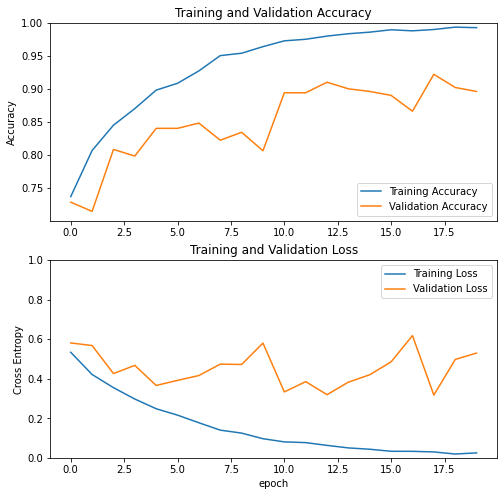

In [15]:
import matplotlib.pyplot as plt
accuracy= history.history['acc']
val_accuracy= history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 89-90%. The validation loss reaches its minimum after only fifteenth epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

Because you have relatively few training samples (2,500), overfitting will be your number-one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation.

# **Data Augmentation**

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

**Setting up a data augmentation configuration via ImageDataGenerator**

This is real-time data augmentation. In this operation,  the model will receive a new set of input image which will not be seen earlier in the previous epoch. In next epoch a new augmented version of input image is generated and model is trained on it.

Let’s quickly go over this code:

**rotation_range** is a value in degrees (0–180), a range within which to randomly rotate pictures.


**width_shift and height_shift** are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.

**shear_range** is for randomly applying shearing transformations.

**zoom_range** is for randomly zooming inside pictures.

**horizontal_flip** is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).

**fill_mode** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

## **Displaying some randomly augmented training images**

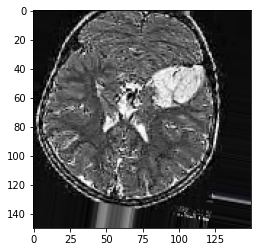

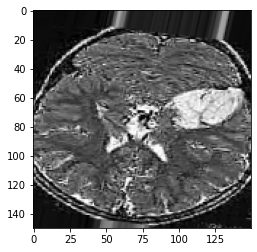

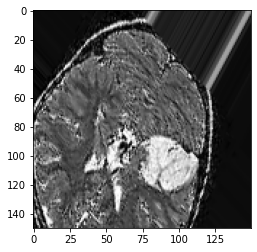

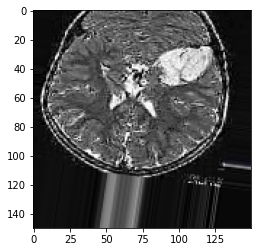

In [17]:
from keras.preprocessing import image
fnames = [os.path.join(train_yes_dir, fname) for
          fname in os.listdir(train_yes_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

## **Defining a new convnet that includes dropout layer**

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

In [18]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(2, activation='softmax'))
model_2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## **Training the convnet using data-augmentation generators**

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

history = model_2.fit(
    train_generator,
    steps_per_epoch=nb_train_steps,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=nb_test_steps)

Found 2500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/20
125/125 [==============================] - 21s 165ms/step - loss: 0.6652 - acc: 0.5815 - val_loss: 0.6121 - val_acc: 0.6520
Epoch 2/20
125/125 [==============================] - 20s 162ms/step - loss: 0.6107 - acc: 0.6717 - val_loss: 0.7234 - val_acc: 0.5880
Epoch 3/20
125/125 [==============================] - 20s 163ms/step - loss: 0.5884 - acc: 0.6723 - val_loss: 0.5783 - val_acc: 0.6940
Epoch 4/20
125/125 [==============================] - 20s 162ms/step - loss: 0.5601 - acc: 0.6991 - val_loss: 0.5627 - val_acc: 0.7280
Epoch 5/20
125/125 [==============================] - 20s 162ms/step - loss: 0.5640 - acc: 0.7064 - val_loss: 0.5881 - val_acc: 0.7000
Epoch 6/20
125/125 [==============================] - 20s 163ms/step - loss: 0.5482 - acc: 0.7101 - val_loss: 0.5773 - val_acc: 0.6960
Epoch 7/20
125/125 [==============================] - 20s 163ms/step - loss: 0.5408 - acc: 0.7357 - val_los

**Showing final training and validation accuracy**

In [20]:
valid_loss, valid_acc = model_2.evaluate(validation_generator, steps=nb_test_steps)
print(f"Final validation accuracy: {valid_acc*100:.2f}%")
loss, acc = model_2.evaluate(train_generator, steps=nb_train_steps)
print(f"Final training accuracy: {acc*100:.2f}%")

25/25 [==============================] - 2s 66ms/step - loss: 0.6611 - acc: 0.7160
Final validation accuracy: 71.60%
125/125 [==============================] - 18s 146ms/step - loss: 0.4188 - acc: 0.8016
Final training accuracy: 80.16%


# **Displaying curves of loss and accuracy during training**

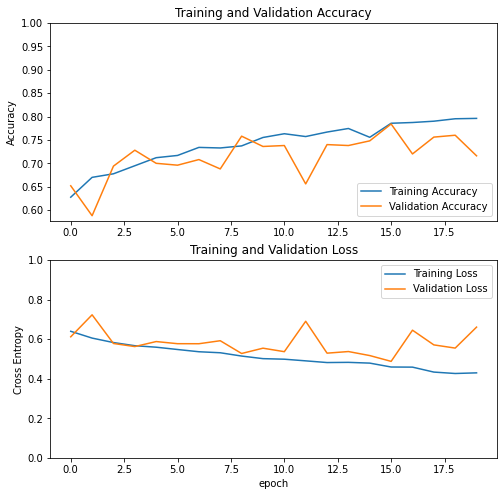

In [21]:
import matplotlib.pyplot as plt
accuracy= history.history['acc']
val_accuracy= history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Now, we can see that the difference between accuracy loss and vslidation los is very less as compared to previous one. This is due to augmentation operation. Now to increase further accuracy we will use transfer learning using a pre-trained model..

##**Saving the model**

In [22]:
model_2.save('/content/drive/MyDrive/Colab Notebooks/brain_tumor_detection_model_2.h5')

After saving the model we can re-load it as shown.

In [23]:
from keras.models import load_model
model_2 = load_model('/content/drive/MyDrive/Colab Notebooks/brain_tumor_detection_model_2.h5')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

## **Visualizing what convnets learn**

**Preprocessing a single image**

In [24]:
img_path = '/content/drive/MyDrive/brain_tumor/pred/pred0.jpg'

In [25]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


**Displaying the test picture**

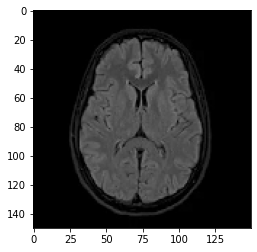

In [26]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

**Instantiating a model from an input tensor and a list of output tensors**

In order to extract the feature maps you want to look at, you’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers.

To do this, you’ll use the Keras class Model. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors).

The resulting class is a Keras model, just like the Sequential models you’re familiar with, mapping the specified inputs to the specified outputs.

In [27]:
layer_names = [layer.name for layer in model_2.layers]
layer_names
layer_outputs = [layer.output for layer in model_2.layers]
activation_model = models.Model(inputs=model_2.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

When fed an image input, this model returns the values of the layer activations in the original model.

This is the first time you’ve encountered a multi-output model in this book: until now, the models you’ve seen have had exactly one input and one output. In the general case, a model can have any number of inputs and outputs. This one has one input and eight outputs: one output per layer activation

In [28]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It’s a 148 × 148 feature map with 32 channels.

Let’s try plotting the fourth channel of the activation of the first layer of the original model

## **Visualizing a channel**

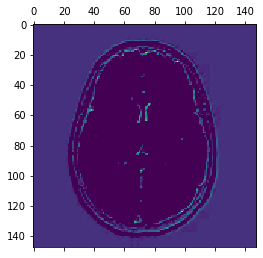

In [29]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')

## **Visualizing every channel in every intermediate activation**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


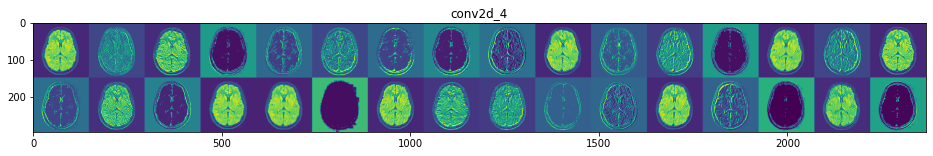

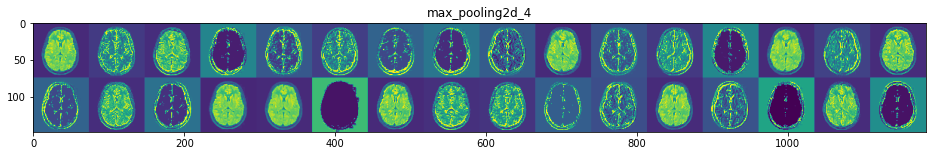

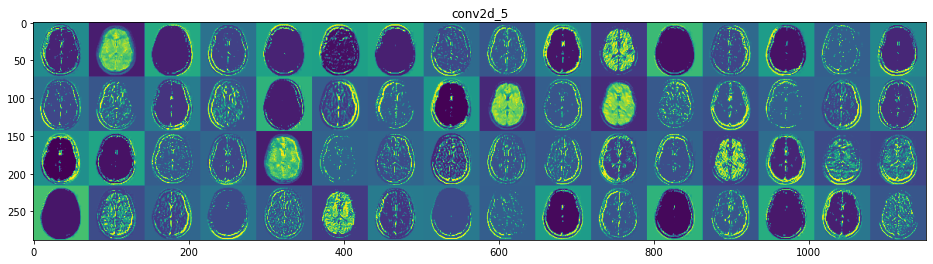

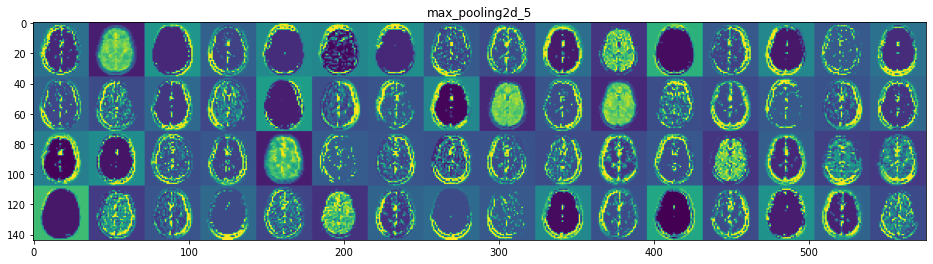

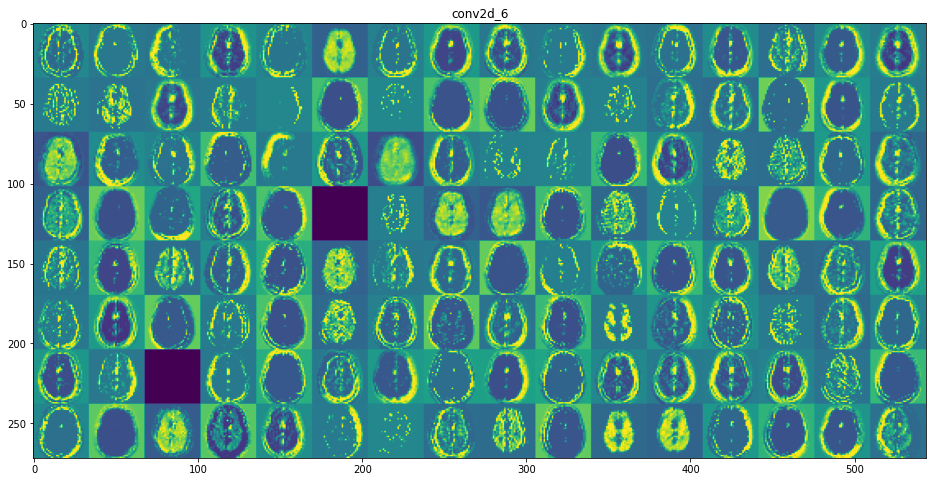

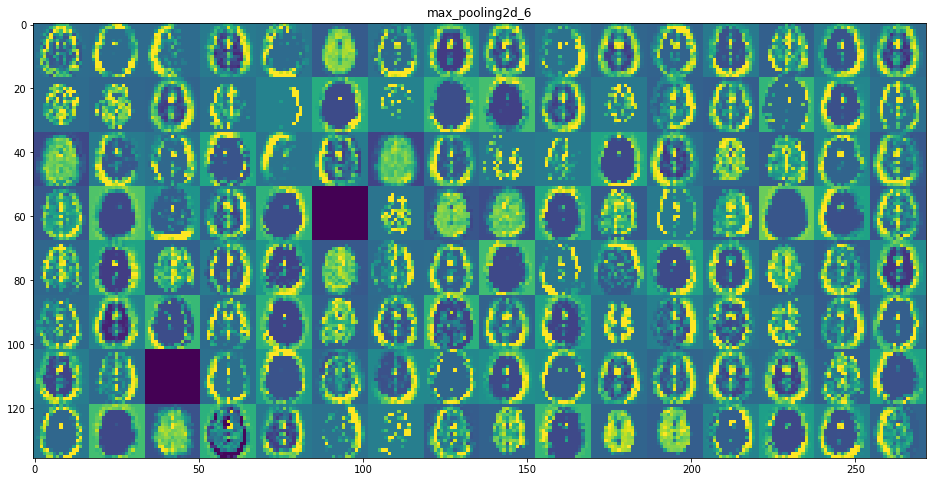

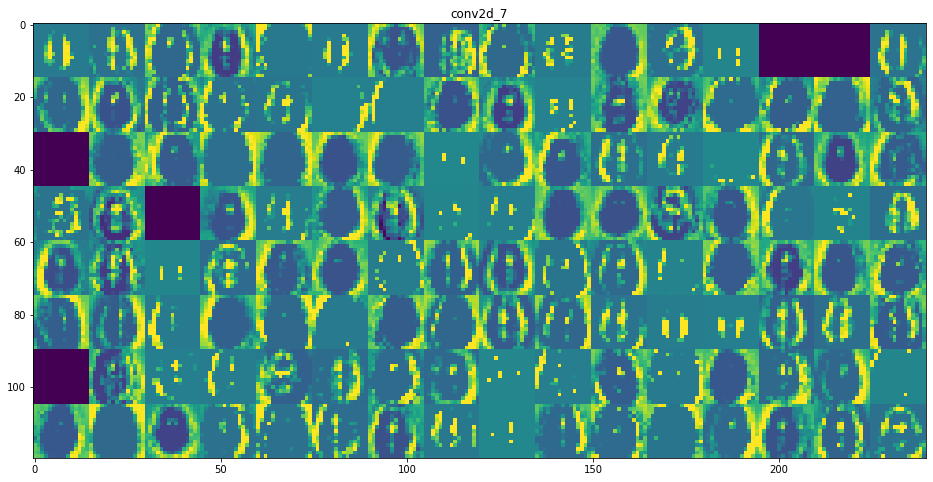

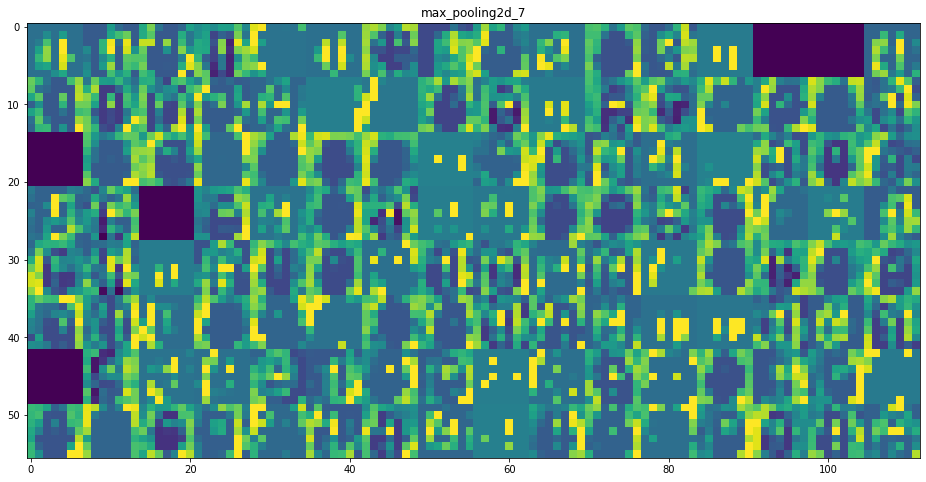

In [30]:
layer_names = []
# Names of the layers, so you can have them as part of your plot
for layer in model_2.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

# Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
  # Number of features in the feature map
  n_features = layer_activation.shape[-1]

  # The feature map has shape (1, size, size, n_features).
  size = layer_activation.shape[1]
  
  # Tiles the activation channels in this matrix
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  
  # Tiles each filter into a big horizontal grid
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:, :,
                                       col * images_per_row + row]
      
      # Post-processes the feature to make it visually palatable
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      
      # Displays the grid
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

## **Transfer Learning using MobileNetV2**
To further increase the accuracy we will use transfer learning. In this a pre-trained model "MobileNetV2" is used.

In [31]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
BATCH_SIZE = 20
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 2500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


### **Showing some images from training set along with its label**

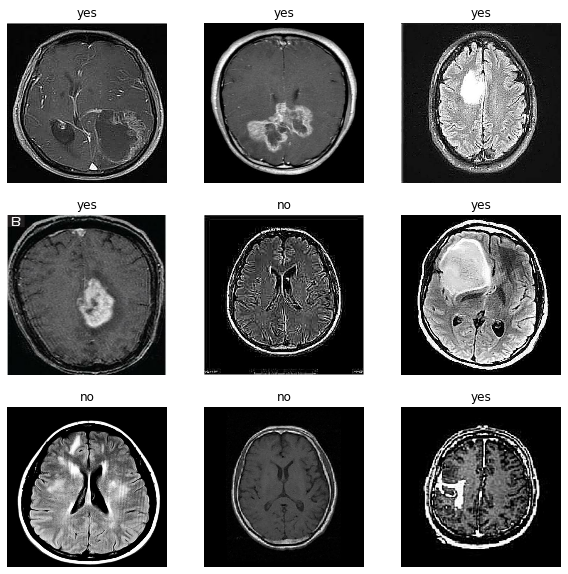

In [32]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

As the original dataset doesn't contain a test set, we will create one. To do so, determine how many batches of data are available in the validation set using tf.data.experimental.cardinality, then move 20% of them to a test set. Since the validation set is small in this case, we will extract it from training set.

In [33]:
val_batches = tf.data.experimental.cardinality(train_dataset)
test_dataset = train_dataset.take(val_batches // 5)
train_dataset = train_dataset.skip(val_batches // 5)

In [34]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 25
Number of test batches: 25


In [35]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


Use data augmentation
When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce overfitting. 

In [36]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

Let's repeatedly apply these layers to the same image and see the result.

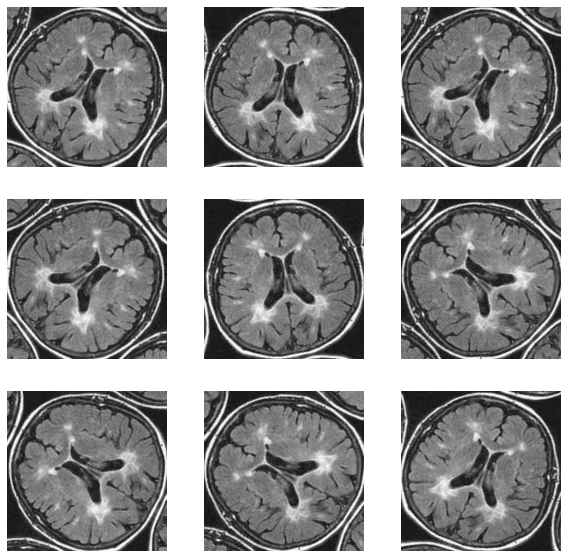

In [37]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

**Rescale pixel values**

In a moment, you will download tf.keras.applications.MobileNetV2 for use as your base model. This model expects pixel values in [-1,1], but at this point, the pixel values in your images are in [0-255]. To rescale them, use the preprocessing method included with the model.

In [38]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)


##**Create the base model from the pre-trained convnets**

You will create the base model from the MobileNet V2 model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [39]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [40]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(20, 5, 5, 1280)


##**Feature extraction**

In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

**Freeze the convolutional base**

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

In [41]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

**Add a classification head**

To generate predictions from the block of features, average over the spatial 5x5 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a logit, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [42]:

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(20, 1280)
(20, 1)


Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using the Keras Functional API. As previously mentioned, use training=False as our model contains a BatchNormalization layer.

In [43]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model_3 = tf.keras.Model(inputs, outputs)

##**Compile the model**

Compile the model before training it. Since there are two classes, use a binary cross-entropy loss with from_logits=True since the model provides a linear output.



In [44]:
base_learning_rate = 0.0001
model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0   

In [46]:
initial_epochs = 10

loss0, accuracy0 = model_3.evaluate(validation_dataset)

25/25 [==============================] - 2s 41ms/step - loss: 0.7192 - accuracy: 0.5463


In [47]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.73
initial accuracy: 0.52


##**Train the model**

In [48]:
history = model_3.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
100/100 [==============================] - 10s 67ms/step - loss: 0.7013 - accuracy: 0.5750 - val_loss: 0.6322 - val_accuracy: 0.6240
Epoch 2/20
100/100 [==============================] - 8s 67ms/step - loss: 0.6026 - accuracy: 0.6590 - val_loss: 0.5759 - val_accuracy: 0.6620
Epoch 3/20
100/100 [==============================] - 8s 67ms/step - loss: 0.5293 - accuracy: 0.7245 - val_loss: 0.5394 - val_accuracy: 0.6900
Epoch 4/20
100/100 [==============================] - 8s 67ms/step - loss: 0.4773 - accuracy: 0.7610 - val_loss: 0.5158 - val_accuracy: 0.6940
Epoch 5/20
100/100 [==============================] - 8s 67ms/step - loss: 0.4461 - accuracy: 0.7790 - val_loss: 0.4940 - val_accuracy: 0.7260
Epoch 6/20
100/100 [==============================] - 8s 66ms/step - loss: 0.4235 - accuracy: 0.7960 - val_loss: 0.4809 - val_accuracy: 0.7440
Epoch 7/20
100/100 [==============================] - 8s 65ms/step - loss: 0.3873 - accuracy: 0.8195 - val_loss: 0.4700 - val_accuracy: 0.758

**Showing final training and validation accuracy**

In [49]:
valid_loss, valid_acc = model_3.evaluate(validation_dataset)
print(f"Final validation accuracy: {valid_acc*100:.2f}%")
loss, acc = model_3.evaluate(train_dataset)
print(f"Final training accuracy: {acc*100:.2f}%")

25/25 [==============================] - 2s 42ms/step - loss: 0.4286 - accuracy: 0.8040
Final validation accuracy: 80.40%
100/100 [==============================] - 6s 52ms/step - loss: 0.3133 - accuracy: 0.8920
Final training accuracy: 89.20%


# **Displaying curves of loss and accuracy during training**

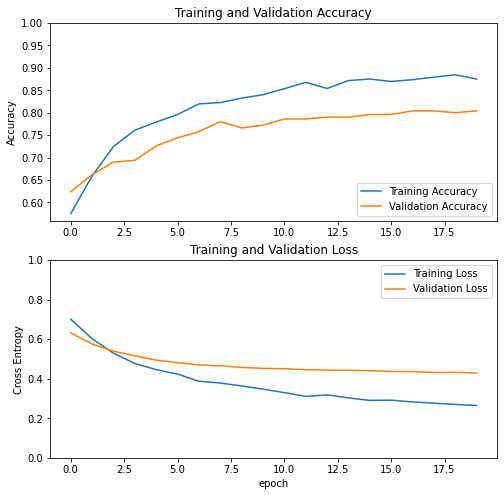

In [50]:
import matplotlib.pyplot as plt
accuracy= history.history['accuracy']
val_accuracy= history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **Making prediction from the model**

**Preprocessing a single image**

In [51]:
from keras.preprocessing import image
img_path = '/content/drive/MyDrive/brain_tumor/pred/pred10.jpg'
test_image=image.load_img(img_path,target_size=(150,150,3))


**Convert into a input tensor and display it**

(1, 160, 160, 3)


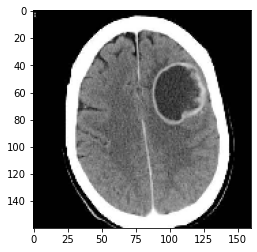

In [52]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path,target_size=(160,160))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

**Making Prediction from test directory**

Predictions:
 [1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1]
Labels:
 [1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1]


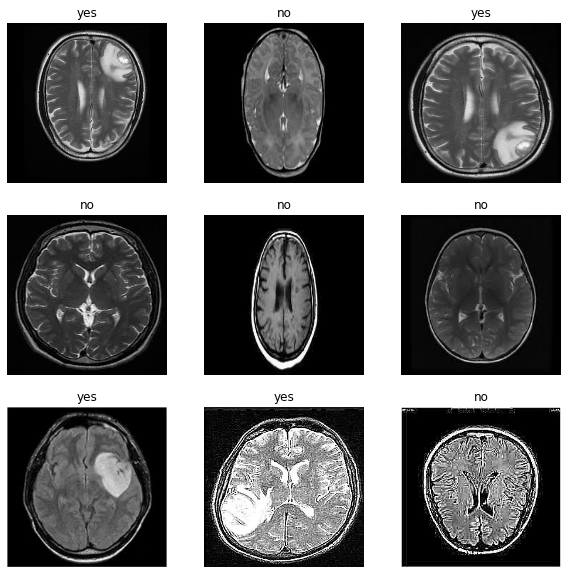

In [53]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model_3.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")